# Critical thinking
### About DVC results...

How accurate can we be? How wrong can we go? 

In [2]:
import tifffile
import matplotlib.pyplot as plt

## Accuracy

Regarding accuracy, how good can we get? Clearly we're subpixel...

- texture?
- scale?
- error?

For a given experimental setup, how could we evaluate (e.g.) displacement errors?

## The "double-tap" (credit: ER)

Minimum good practice in tomo imaging, acquire a static image **at least twice** (N.B. this can be difficult).

Even better: controlled displacements, zooms, rotations to learn about acquisition as well.

Let's play with M2EA99:
  - Very high res initial image (+labelled)
  - fixed displacement, rotation, zoom

## M2EA99 challenge
What is the rotational accuracy of this experimental setup with these grains?

(420, 320, 320) 65535.0


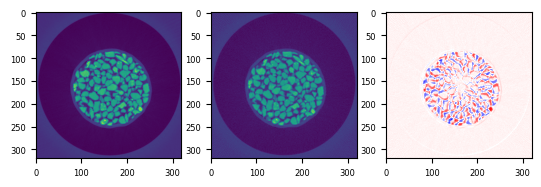

In [3]:
im1 = tifffile.imread("media/M2EA99-000-HR-bin4.tif").astype(float)
print(im1.shape, im1.max())
im2 = tifffile.imread("media/M2EA99-000-rot5deg.tif").astype(float)
plt.subplot(1,3,1); plt.imshow(im1[210])
plt.subplot(1,3,2); plt.imshow(im2[210])
plt.subplot(1,3,3); plt.imshow(im1[210]-im2[210], cmap='bwr')
plt.show()

In [9]:
import spam.DIC, spam.deformation
reg = spam.DIC.registerMultiscale(im1, im2, 8)

print("-- Phi --")
for k in (Phi := spam.deformation.decomposePhi(reg['Phi'])).keys():
    print(f"\t{k}: {Phi[k]}")

-- Phi --
	t: [ 0.248 -0.526 -0.392]
	r: [-4.991 -0.001 -0.001]
	z: [0.9999176244094793, 0.9998744863398799, 0.9998698278535451]
	U: [[ 1. -0. -0.]
 [-0.  1.  0.]
 [-0.  0.  1.]]
	e: [[-0.    -0.    -0.   ]
 [-0.    -0.004  0.   ]
 [-0.     0.    -0.004]]
	vol: -0.0003380244581591141
	dev: 4.806635534847869e-05
	volss: -0.00791961186809087
	devss: 0.003132424128675458


In [5]:
# ...Now what??

## Visualising Results

- Displacements
  - Regular field ⇒ TIFF?
  - Discrete or Mesh ⇒ Paraview (glyph or mesh)
- Rotations
- Residuals
  - Pixelwise differences, when is it easy to compute?
- Future: Napari plugin with overlay!?